<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-Load-Data" data-toc-modified-id="Import-Libraries-and-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and Load Data</a></span><ul class="toc-item"><li><span><a href="#Load-utility-functions" data-toc-modified-id="Load-utility-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load utility functions</a></span></li></ul></li><li><span><a href="#Statistics-–-Task-1" data-toc-modified-id="Statistics-–-Task-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistics – Task 1</a></span><ul class="toc-item"><li><span><a href="#Variables-selection" data-toc-modified-id="Variables-selection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Variables selection</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Summary Statistics</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Histograms</a></span></li><li><span><a href="#Pearson-and-spearman-correlation" data-toc-modified-id="Pearson-and-spearman-correlation-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Pearson and spearman correlation</a></span></li></ul></li><li><span><a href="#Select-and-Train-Classifiers-–-Task-2" data-toc-modified-id="Select-and-Train-Classifiers-–-Task-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Select and Train Classifiers – Task 2</a></span><ul class="toc-item"><li><span><a href="#Perform-Preprocessing" data-toc-modified-id="Perform-Preprocessing-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Perform Preprocessing</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Split Data</a></span></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Evaluation-of-the-Classifiers-–-Task-3" data-toc-modified-id="Evaluation-of-the-Classifiers-–-Task-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation of the Classifiers – Task 3</a></span><ul class="toc-item"><li><span><a href="#Evaluation-of-Support-Vector-Machine" data-toc-modified-id="Evaluation-of-Support-Vector-Machine-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Evaluation of Support Vector Machine</a></span></li><li><span><a href="#Evaluation-of-Random-Forest-Classifier" data-toc-modified-id="Evaluation-of-Random-Forest-Classifier-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation of Random Forest Classifier</a></span></li></ul></li><li><span><a href="#Feature-Importance-–-Task-4" data-toc-modified-id="Feature-Importance-–-Task-4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Importance – Task 4</a></span><ul class="toc-item"><li><span><a href="#Model-improvement" data-toc-modified-id="Model-improvement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model improvement</a></span></li></ul></li></ul></div>

# Import Libraries and Load Data

In [143]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from scipy import stats
import pandas.plotting as plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
import os
import math

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


%matplotlib inline
%reload_ext autoreload
%autoreload 2

plt.style.use("ggplot")
warnings.filterwarnings("ignore")


## Load utility functions

In [85]:
def accuracy(y_true, y_pred):
    
    """ 
    Function to calculate the accuracy of a binary classifier 
    
    Parameters:
    ---
    y_true: numpy array,
            ground truth values to be predicted
        
    y_pred: numpy array, 
            values predicted from model
    
    Returns:
    ---
    The accuracy of the binary model
    """
    
    #True Positives
    tp = sum(np.logical_and(y_true == True, y_pred == True))
    
    #True Negatives
    tn = sum(np.logical_and(y_true == False, y_pred == False))
    
    #False Positives
    fp = sum(np.logical_and(y_true == False, y_pred == True))
    
    #False Negatives
    fn = sum(np.logical_and(y_true == True, y_pred == False))
    
    acc = (tp + tn)/(tp + tn + fp + fn)
    return acc


def evaluation(y_true, y_pred):
    
    """ 
    Function to calculate the accuracy of a binary classifier 
    
    Parameters:
    ---
    y_true: numpy array,
            ground truth values to be predicted
        
    y_pred: numpy array, 
            values predicted from model
    
    Returns:
    ---
    A tuple with the following values:
    (sensitivity, specificity, accuracy, precision, recall)
    """
    #True Positives
    tp = sum(np.logical_and(y_true == True, y_pred == True))
    
    #True Negatives
    tn = sum(np.logical_and(y_true == False, y_pred == False))
    
    #False Positives
    fp = sum(np.logical_and(y_true == False, y_pred == True))
    
    #False Negatives
    fn = sum(np.logical_and(y_true == True, y_pred == False))
    
    acc = (tp + tn)/(tp + tn + fp + fn)
        
    sens = tp/(fn+tp)
    
    spec = tn/(fp+tn)
    
    prec = tp/(tp+fp)
    
    rec = tp/(tp + fn)
    
    return ( sens, spec, acc, prec, rec)

def plot_ROC_curve(y_true, y_probs, save_path_title = None):
    """
    Parameters
    ----------
    y_true : list/array of bool/int
        Classification ground truth values.
    y_probs : list/array of double, 
        Probability for classification as true.
    save_path_title : string, optional
        Filename, under which the ROC curve should be saved. The default is None.

    Returns
    -------
    auc_value : double
        Area under Curve value.

    """
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_probs) 
    auc_value = sklearn.metrics.roc_auc_score(y_true, y_probs)
    plt.plot(fpr[1:], tpr[1:], label = "ROC curve")
    plt.plot(list(range(0,2)), list(range(0,2)), label = "Random")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC-Curve, AUC = {}".format(auc_value))

    if save_path_title != None:
        plt.savefig(save_path_title)
    return auc_value


In [89]:
#Feature Names Lists
feature_names_wdbc = [
    "id", "diagnosis",\
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]
feature_names_wpbc = [
    "id", "recurrence", "time",\
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave_points_worst", "symmetry_worst", "fractal_dimension_worst",
    "tumor_size", "lymph_status"
]

#Load Datasets
wdbc_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", names=feature_names_wdbc)
wpbc_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wpbc.data", names=feature_names_wpbc)
print("datasets loaded!")

data = wdbc_df.drop(['id'], axis=1)

datasets loaded!


# Statistics – Task 1

**Let's select 3 variables for analysis. They shouldn't be corralated with each other**

## Variables selection

Text(0.5, 1.0, 'Correlation Map')

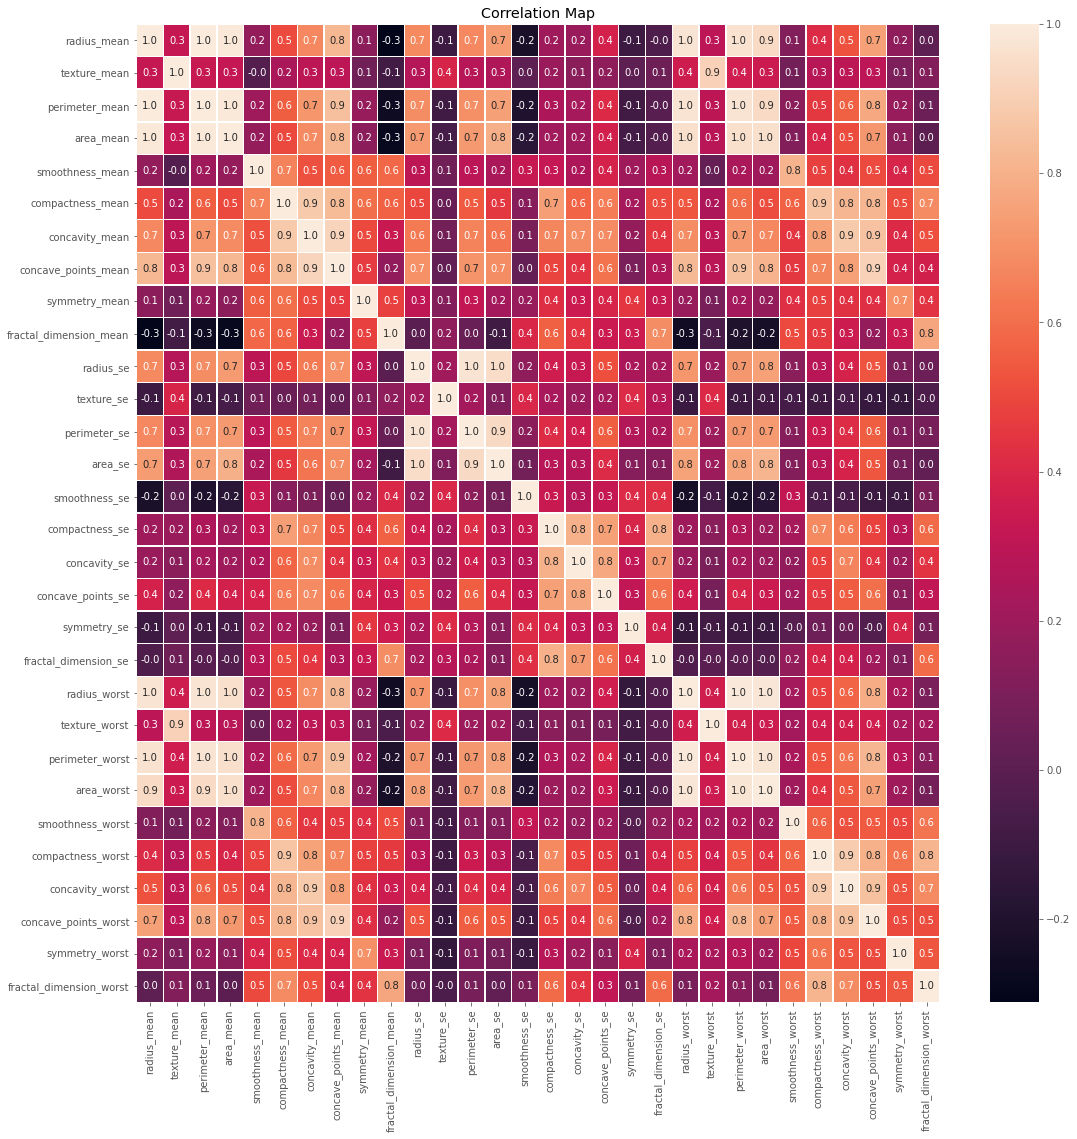

In [5]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')

Appropriate features are:
* area_worst
* smoothness_worst
* texture_mean

Text(0.5, 1.0, 'Correlation map of selected variables')

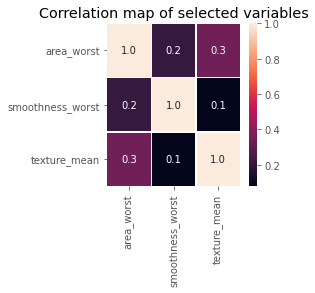

In [5]:
fdata = data[['area_worst', 'smoothness_worst', 'texture_mean']]
f,ax=plt.subplots(figsize = (3,3))
sns.heatmap(fdata.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation map of selected variables')

**The next step is to clear data form outliers**

## Outliers

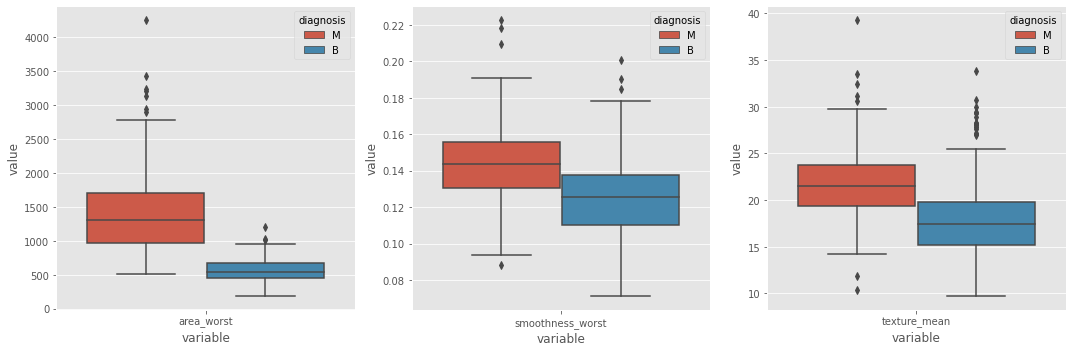

In [6]:
melted_data_rm = pd.melt(data,id_vars = "diagnosis",value_vars = ['area_worst'])
melted_data_sm = pd.melt(data,id_vars = "diagnosis",value_vars = ['smoothness_worst'])
melted_data_ts = pd.melt(data,id_vars = "diagnosis",value_vars = ['texture_mean'])

fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_rm,ax=axs[0])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_sm,ax=axs[1])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_ts,ax=axs[2])
fig.tight_layout()

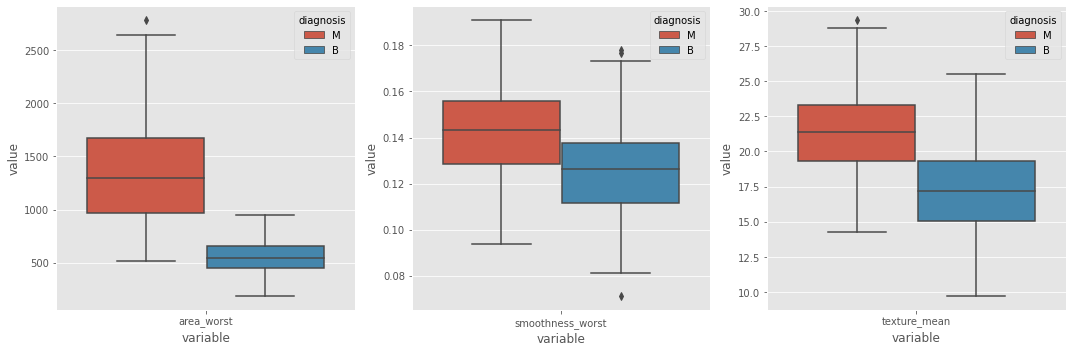

In [7]:
def clear_outlires(feature, data):    
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1    
    return data[~((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

def clear_outlires_m_b(feature, data):    
    return pd.concat([clear_outlires(feature, data[data["diagnosis"] == "M"]), 
                    clear_outlires(feature, data[data["diagnosis"] == "B"])])

data_c = clear_outlires_m_b('texture_mean', clear_outlires_m_b('smoothness_worst', clear_outlires_m_b('area_worst', data)))

melted_data_rm = pd.melt(data_c,id_vars = "diagnosis",value_vars = ['area_worst'])
melted_data_sm = pd.melt(data_c,id_vars = "diagnosis",value_vars = ['smoothness_worst'])
melted_data_ts = pd.melt(data_c,id_vars = "diagnosis",value_vars = ['texture_mean'])

fig, axs = plt.subplots(figsize=(15, 5), ncols=3)
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_rm,ax=axs[0])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_sm,ax=axs[1])
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data_ts,ax=axs[2])
fig.tight_layout()


## Summary Statistics

In [8]:
data_c[['area_worst', 'smoothness_worst', 'texture_mean']].describe()

area_worst  smoothness_worst  texture_mean
count   527.000000        527.000000    527.000000
mean    854.615370          0.132101     18.842486
std     503.721347          0.021426      3.686012
min     185.200000          0.071170      9.710000
25%     514.650000          0.117150     16.070000
50%     684.500000          0.131300     18.610000
75%    1037.500000          0.145800     21.460000
max    2782.000000          0.190900     29.330000

## Histograms

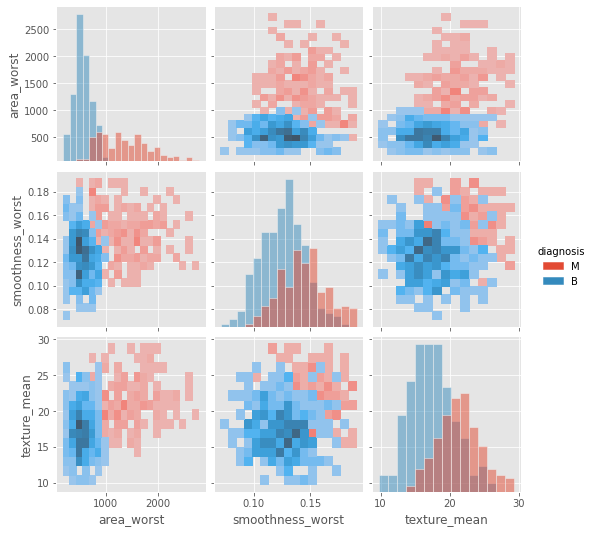

In [9]:
sns.pairplot(data_c[['diagnosis','area_worst', 'smoothness_worst', 'texture_mean']], hue='diagnosis', kind='hist')

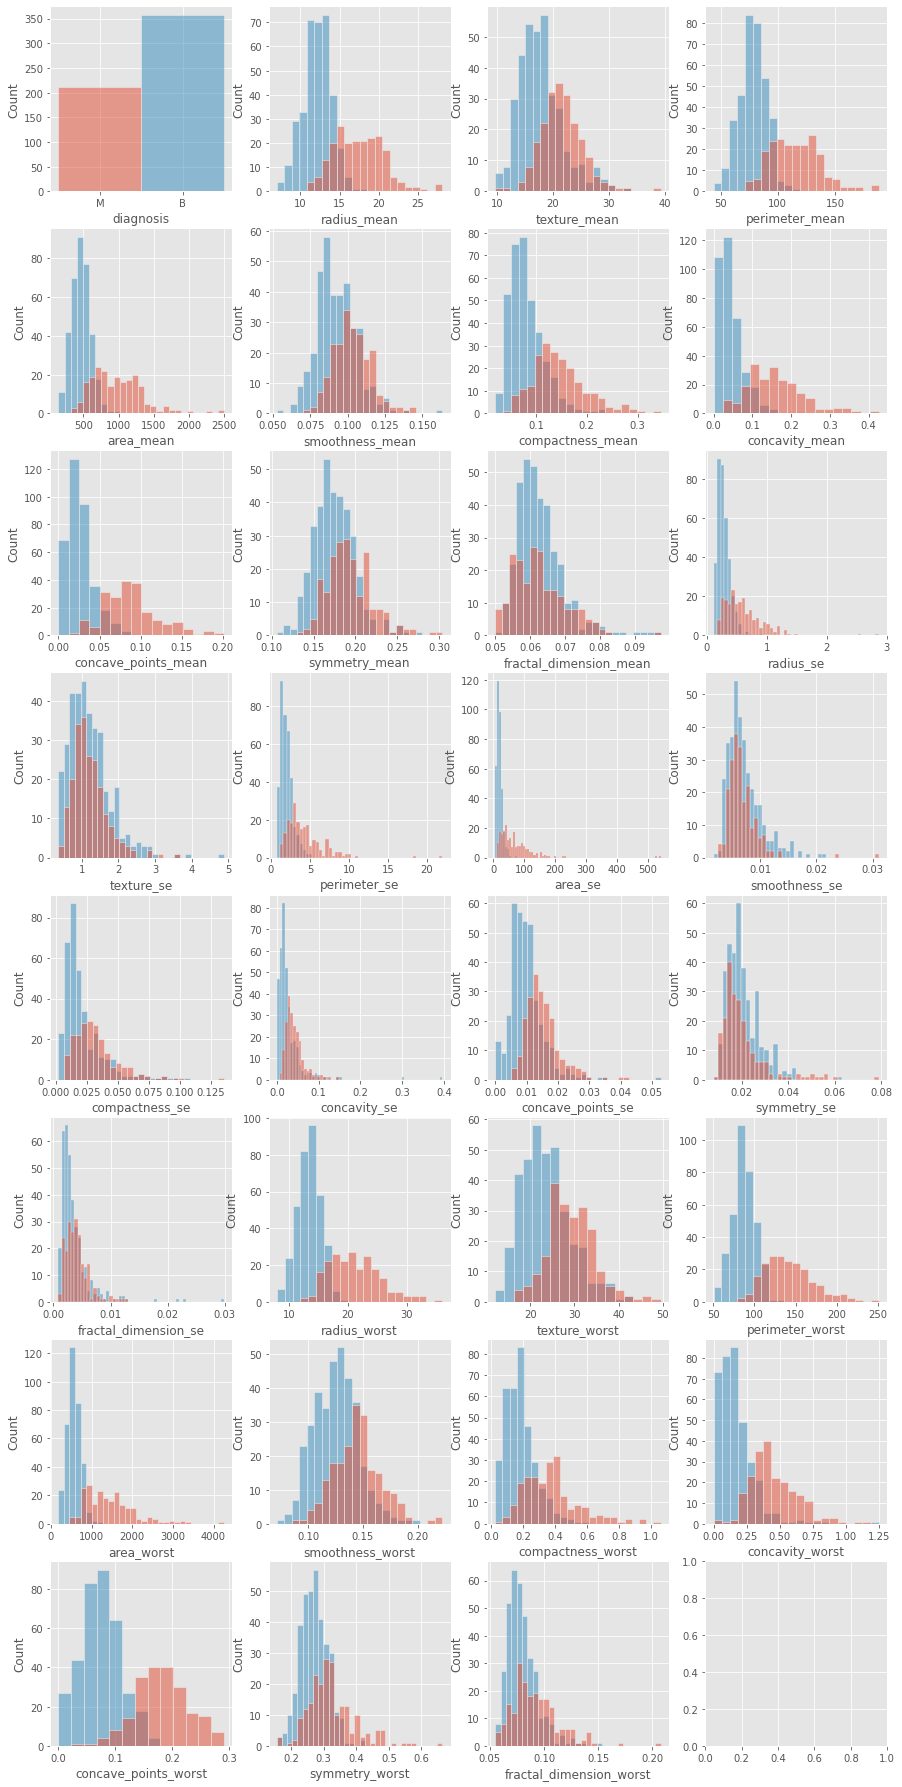

In [347]:
import math
def plotHistograms(df, tarClass):
    cols = 4
    rows = max(int(math.ceil(len(df.columns)/cols)),2)
    f, axes = plt.subplots(rows, cols, figsize=(15, rows*4), sharex=False)
    i = 0
    for col in df.columns:
        id1 = int(math.floor(i/cols))
        id2 = i-id1*cols
        sns.histplot( data=df, x=col, hue=tarClass, ax=axes[id1,id2], legend=False)
        i+=1

plotHistograms(data, "diagnosis")

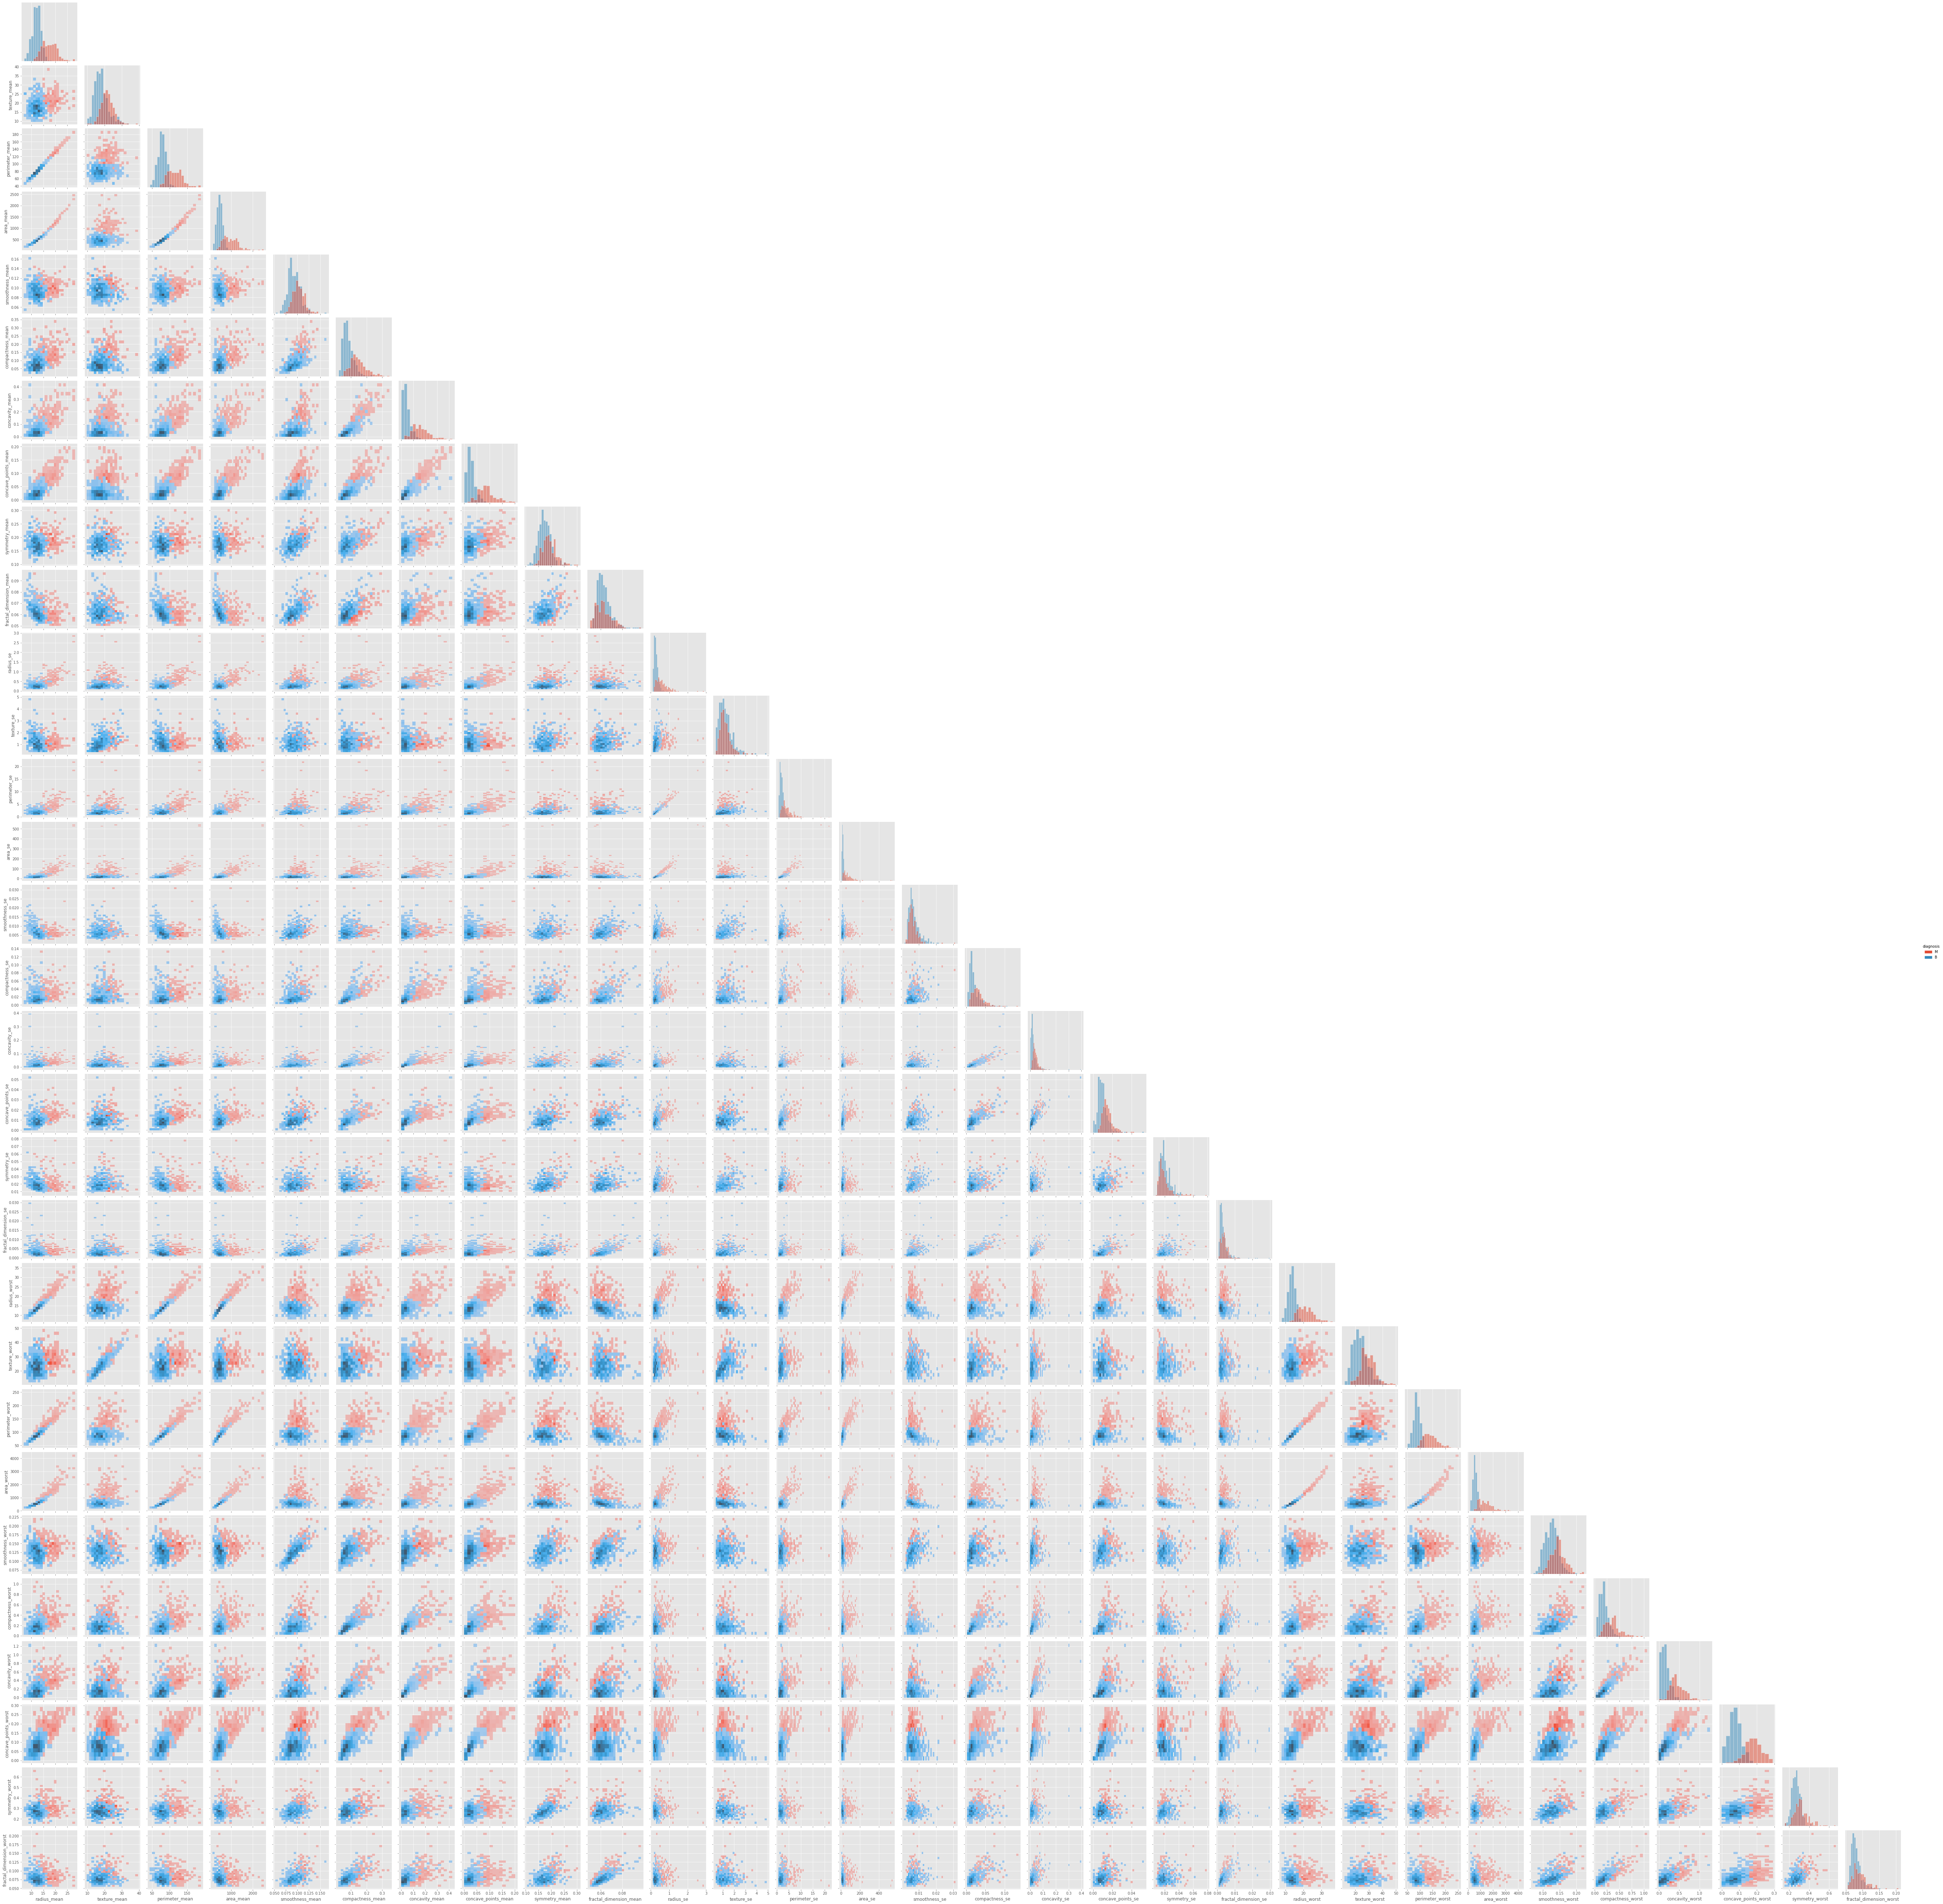

In [124]:
sns.pairplot(data, hue='diagnosis', kind='hist', corner=True)

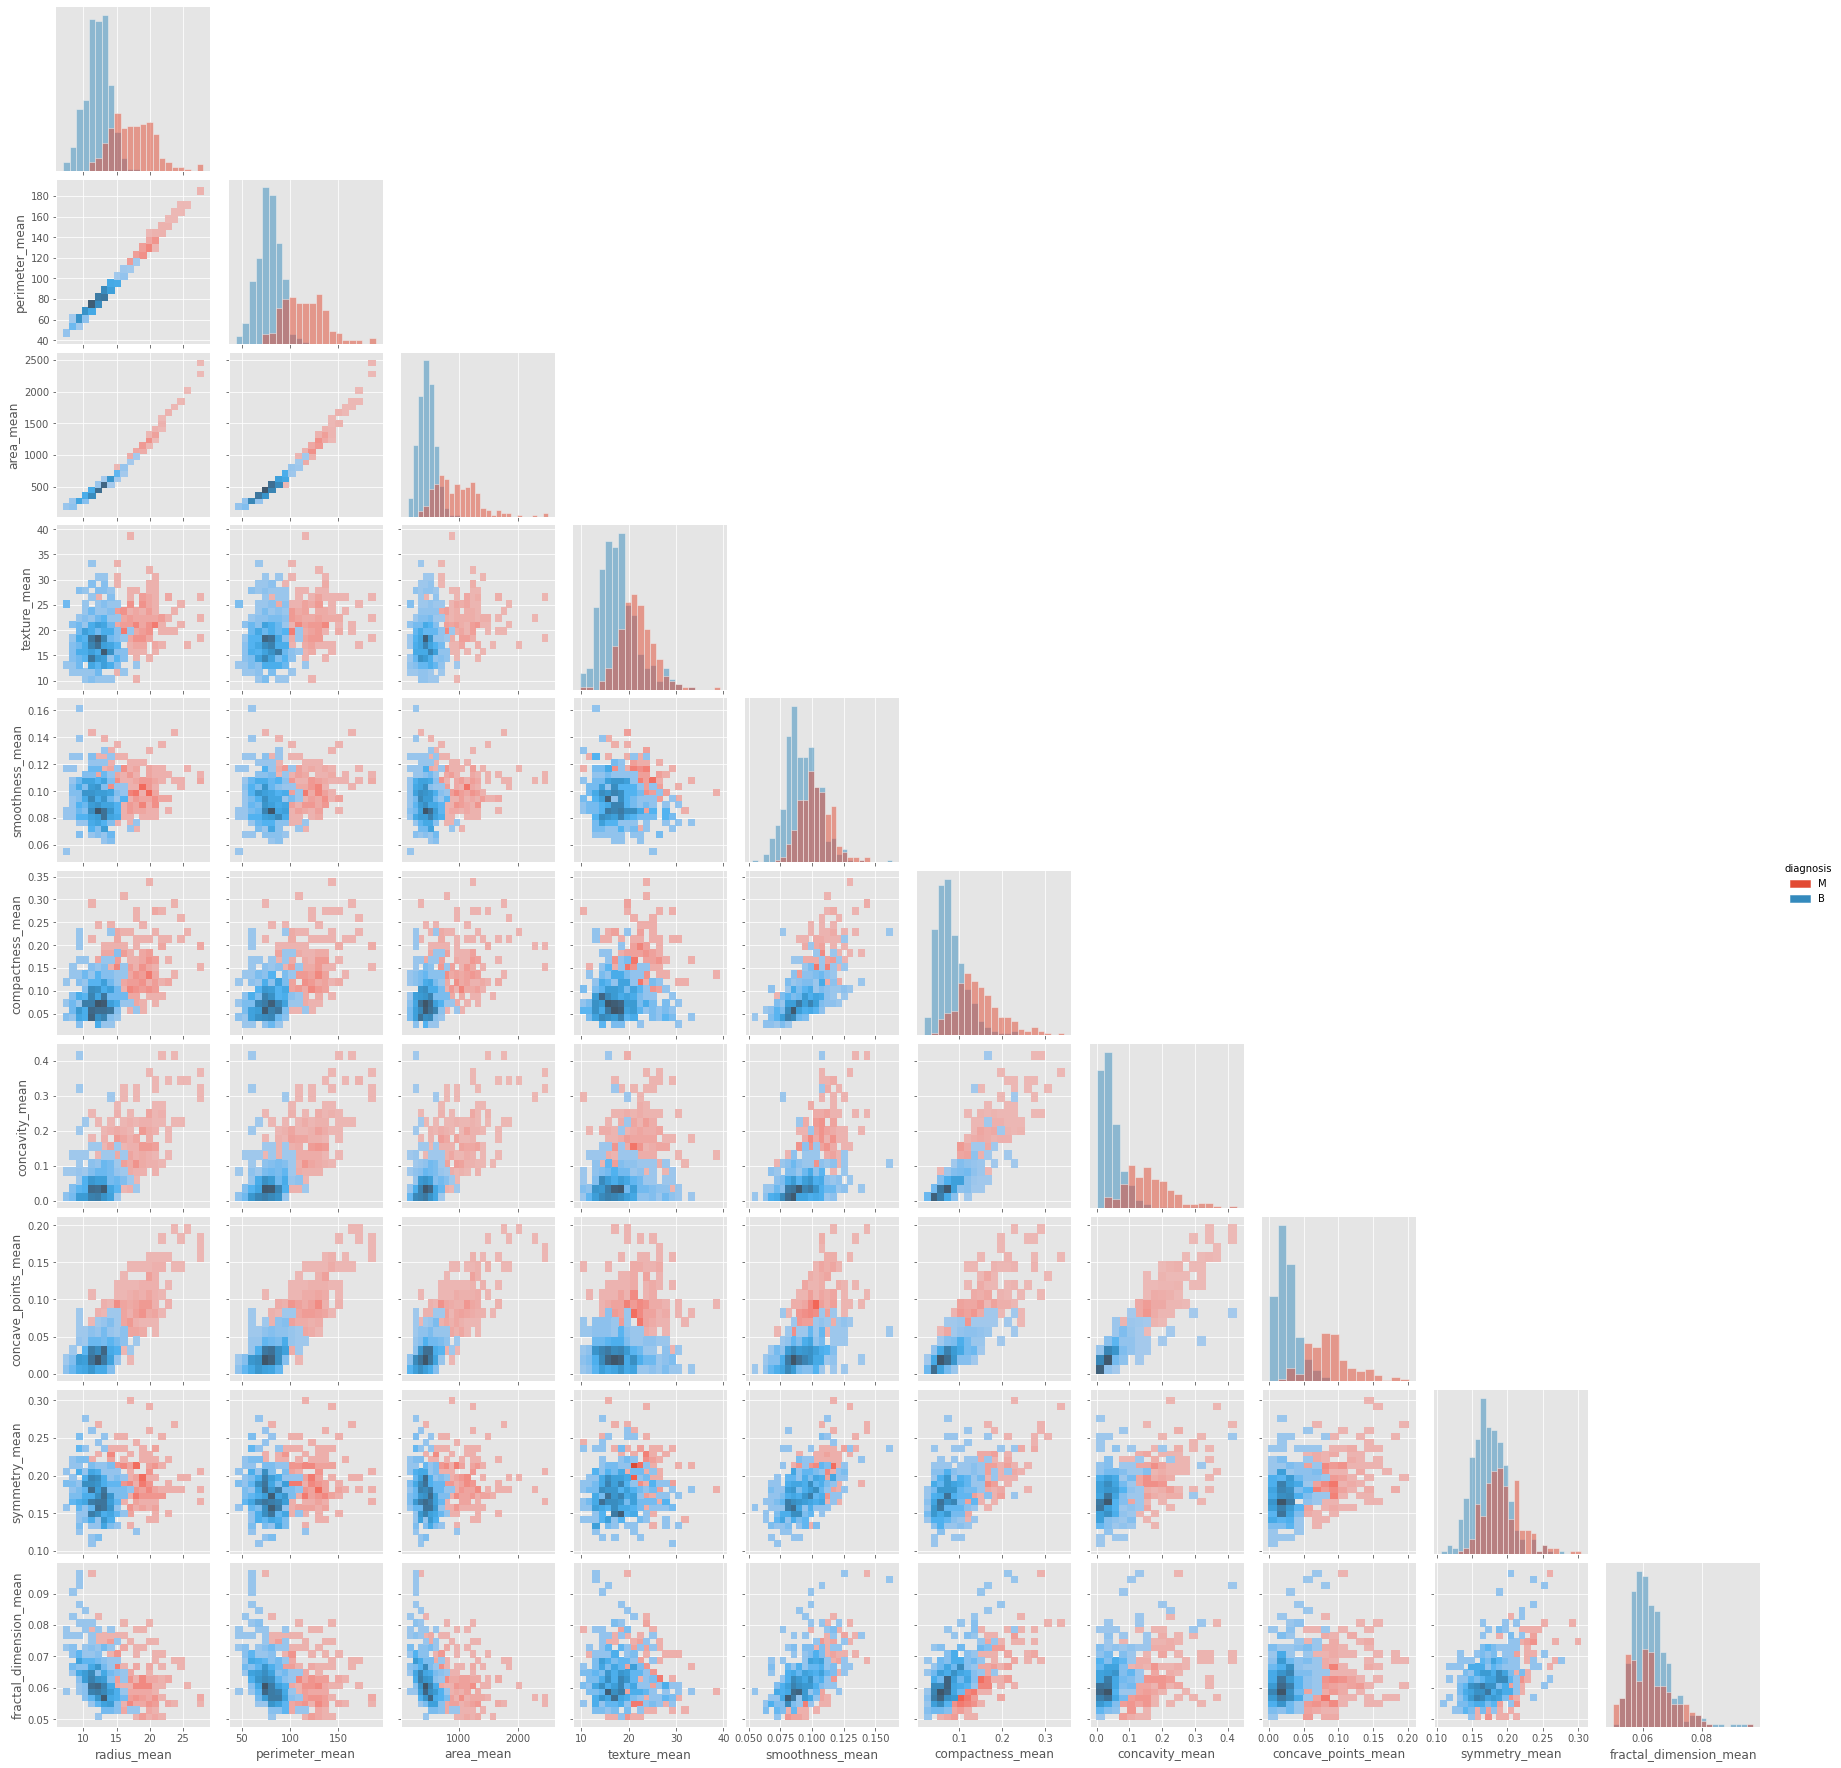

In [131]:
sns.pairplot(data[["diagnosis","radius_mean", "perimeter_mean", "area_mean","texture_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean"]], hue='diagnosis', kind='hist', corner=True)

## Pearson and spearman correlation

In [10]:
print('Pearson correlation')
data_c.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "pearson")

Pearson correlation


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.234198      0.427652
smoothness_worst    0.234198          1.000000      0.180217
texture_mean        0.427652          0.180217      1.000000

In [11]:
print('Pearson correlation with outliers')
data.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "pearson")

Pearson correlation with outliers


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.209145      0.343546
smoothness_worst    0.209145          1.000000      0.077503
texture_mean        0.343546          0.077503      1.000000

In [12]:
print('Spearman correlation')
data_c.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "spearman")

Spearman correlation


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.211331      0.413454
smoothness_worst    0.211331          1.000000      0.176030
texture_mean        0.413454          0.176030      1.000000

In [13]:
print('Spearman correlation with outliers')
data.loc[:,['area_worst', 'smoothness_worst', 'texture_mean']].corr(method= "spearman")

Spearman correlation with outliers


area_worst  smoothness_worst  texture_mean
area_worst          1.000000          0.210063      0.368335
smoothness_worst    0.210063          1.000000      0.101401
texture_mean        0.368335          0.101401      1.000000

# Select and Train Classifiers – Task 2

## Perform Preprocessing
Encode binary target columns into integer values and remove unneeded columns like id.
To show the threshold until features may add predictive power to the model a random variable is added to the datasets

In [134]:
# Transform diagnosis column into binary int --> target
wdbc_model_data = wdbc_df.copy()
wdbc_model_data["target"] = np.where(wdbc_model_data['diagnosis'] == "M", 1, 0)
#Drop unnecessary columns
wdbc_model_data = wdbc_model_data.drop(columns=["diagnosis", "id"])

# Transform recurrence column into binary int --> target
wpbc_model_data = wpbc_df.copy()
wpbc_model_data["target"] = np.where(
    wpbc_model_data['recurrence'] == "R", 1, 0)
#Drop unnecessary columns
wpbc_model_data = wpbc_model_data.drop(
    columns=["recurrence", "id", "time", "tumor_size", "lymph_status"])

#Add a random value column
# Use seed to create repeatable "random" results
np.random.seed(42)
# Add column
wdbc_model_data["random"] = np.random.random(size=len(wdbc_model_data))
wpbc_model_data["random"] = np.random.random(size=len(wpbc_model_data))

## Split Data
Split the datasets in labels - y and features - X as preparation for model training.
Apply a train test split for wdbc data to validate the model.

In [135]:
y_wdbc = wdbc_model_data["target"]
X_wdbc = wdbc_model_data.drop("target", axis=1)

y_wpbc = wpbc_model_data["target"]
X_wpbc = wpbc_model_data.drop("target", axis=1)

# Train/test split in a .75/.25 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X_wdbc, y_wdbc, test_size=.25, random_state=0)

## Support Vector Machine

A pipeline is generated and the standard scaler is added, to remove the variable mean and use unit variance. 
SVC is added to the pipeline with a linear kernel to get meaningful feature importance calculation with inbuilt SVC coefficients

In [348]:
# Group function to train fit and evaluate the Support Vector Classifier
def trainAndFitSVC(train):
    sk_pipe = make_pipeline(StandardScaler(),SVC(kernel="linear", probability=True, random_state=0))
    sk_pipe.fit(train[0], train[1])
    return sk_pipe

svc_pipe = trainAndFitSVC((X_train, y_train))

## Random Forest

A pipeline is generated and the standard scaler is added, to remove the variable mean and use unit variance. 
SVC is added to the pipeline with a linear kernel to get meaningful feature importance calculation with inbuilt SVC coefficients

In [137]:
# Group function to train fit and evaluate the Random Forest Classifier
def trainAndFitRFC(train):
    sk_pipe = make_pipeline(StandardScaler(),RFC(n_estimators=20,random_state=0))
    sk_pipe.fit(train[0], train[1])
    return sk_pipe
    
rf_pipe = trainAndFitRFC((X_train,y_train))

# Evaluation of the Classifiers – Task 3

## Evaluation of Support Vector Machine

The test accuracy is 0.951048951048951
The test precision is 0.9107142857142857
The test recall is 0.9622641509433962
The test sensitivity is 0.9622641509433962
The test specificity is 0.9444444444444444


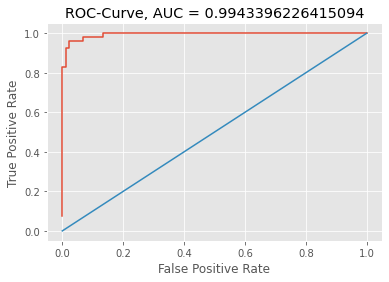

In [138]:
def evaluate(pipe, test):
    y_pred_proba = pipe.predict_proba(test[0])
    y_pred = pipe.predict(test[0])
    test_sens, test_spec, test_acc, test_prec, test_rec = evaluation(
            test[1], y_pred)
    print("The test accuracy is {}".format(test_acc))
    print("The test precision is {}".format(test_prec))
    print("The test recall is {}".format(test_rec))
    print("The test sensitivity is {}".format(test_sens))
    print("The test specificity is {}".format(test_spec))
    plot_ROC_curve(test[1], y_pred_proba[:, 1])

evaluate(svc_pipe, (X_test,y_test))

## Evaluation of Random Forest Classifier

In [139]:
evaluate(rf_pipe, (X_test,y_test))

The test accuracy is 0.9790209790209791
The test precision is 0.9629629629629629
The test recall is 0.9811320754716981
The test sensitivity is 0.9811320754716981
The test specificity is 0.9777777777777777


# Feature Importance – Task 4

Two feature importance functions are used:
1. The inbuilt coefficients of SVC are evaluated and visualized with a barplot
2. The Eli5 library is used to calculate the feature weights and order them by importance


In [372]:
# Generate feature importance plot based on the inbuilt SVC coefficients
def f_importancesSVC(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10,6))
    ax.barh(range(len(names)), imp, align='center')
    ax.set_xlabel('Weight %')
    ax.set_title('Feature Importance with SVC Coefficient')
    ax.set_yticks(range(len(names)))
    ax.set_yticklabels(names)
    plt.show()

# Generate feature importance plot based on eli5 library
def f_importances(estimator,feature_names, transformedTest):
    perm = PermutationImportance(estimator, random_state=1).fit(transformedTest[0], transformedTest[1])
    exp = eli5.explain_weights(perm, feature_names=feature_names, top=35 )
    exp_df = eli5.format_as_dataframe(exp)
    exp_df["weight"] = exp_df["weight"]
    imp,names = zip(*sorted(zip(exp_df["weight"],exp_df["feature"])))
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10,6))
    ax.barh(range(len(names)), imp, align='center')
    ax.set_xlabel('Weight')
    ax.set_title('Feature Importance Eli5')
    ax.set_yticks(range(len(names)))
    ax.set_yticklabels(names)
    plt.show()
    return exp

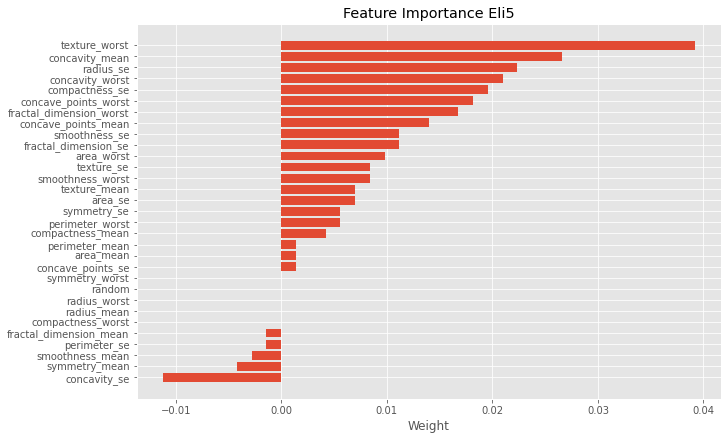

Explanation(estimator="PermutationImportance(estimator=SVC(kernel='linear', probability=True,\n                                    random_state=0),\n                      random_state=1)", description="\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don't reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n", error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='texture_worst', weight=0.03916083916083912, std=0.023652495839563307, value=None), FeatureWeight(feature='concavity_mean', weight=0.02657342657342654, std=0.011188811188811196, value=None), FeatureWeight(feature='radius_se', weight=0.022377622377622353, std=0.014932976576267565, value=None), FeatureWeight(feature='concavity_worst', weight=0.020979020979020935, std=0.012509471202796, value=None), FeatureWeight(feature='compactness_se', weight=0.01958041958041956, std=0.01618998168222409, value=None), FeatureWeight(feature='concave_points_worst', weight=0.018181818181818143, std=0.009485776200175182, value=None), FeatureWeight(feature='fractal_dimension_worst', weight=0.01678321678321675, std=0.007131495823206678, value=None), FeatureWeight(feature='concave_points_mean', weight=0.013986013986013957, std=0.006254735601398, value=None), FeatureWeight(feature='fractal_dimension_se', weight=0.011188811188811165, std=0.009485776200175182, value=None), FeatureWeight(feature='smoothness_se', weight=0.011188811188811165, std=0.007131495823206677, value=None), FeatureWeight(feature='area_worst', weight=0.00979020979020977, std=0.011362291475015305, value=None), FeatureWeight(feature='smoothness_worst', weight=0.008391608391608374, std=0.008155177475308095, value=None), FeatureWeight(feature='texture_se', weight=0.008391608391608374, std=0.006851719560232651, value=None), FeatureWeight(feature='area_se', weight=0.006993006993006978, std=0.006254735601398, value=None), FeatureWeight(feature='texture_mean', weight=0.006993006993006978, std=0.007660455349722588, value=None), FeatureWeight(feature='perimeter_worst', weight=0.005594405594405582, std=0.005233087254229277, value=None), FeatureWeight(feature='symmetry_se', weight=0.005594405594405582, std=0.006851719560232652, value=None), FeatureWeight(feature='compactness_mean', weight=0.004195804195804187, std=0.007131495823206676, value=None), FeatureWeight(feature='perimeter_mean', weight=0.0013986013986013956, std=0.002797202797202791, value=None), FeatureWeight(feature='area_mean', weight=0.0013986013986013956, std=0.005233087254229277, value=None), FeatureWeight(feature='concave_points_se', weight=0.0013986013986013734, std=0.013559943657108619, value=None), FeatureWeight(feature='random', weight=0.0, std=0.0, value=None), FeatureWeight(feature='radius_worst', weight=0.0, std=0.008845531916554888, value=None), FeatureWeight(feature='compactness_worst', weight=0.0, std=0.011701538832644388, value=None), FeatureWeight(feature='symmetry_worst', weight=0.0, std=0.006254735601398, value=None), FeatureWeight(feature='radius_mean', weight=0.0, std=0.006254735601398, value=None), FeatureWeight(feature='fractal_dimension_mean', weight=-0.0013986013986013956, std=0.002797202797202791, value=None), FeatureWeight(feature='perimeter_se', weight=-0.001398601398601418, std=0.012031224149709979, value=None), FeatureWeight(feature='smoothness_mean', weight=-0.002797202797202791, std=0.005594405594405583, value=None), FeatureWeight(feature='symmetry_mean', weight=-0.004195804195804187, std=0.003425859780116326, value=None), FeatureWeight(feature='concavity_se', weight=-0.011188811188811165, std=0.0034258597801163256, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, tra

In [373]:
f_importancesSVC(svc_pipe.named_steps['svc'].coef_[0], list(X_train.columns))

X_test_tf = svc_pipe[:-1].transform(X_test)
f_importances(svc_pipe.named_steps['svc'],list(X_train.columns),(X_test_tf, y_test))

In [374]:
# Transform Test data
X_test_rf_tf = rf_pipe[:-1].transform(X_test)
f_importances(rf_pipe.named_steps['randomforestclassifier'], list(X_train.columns), (X_test_rf_tf, y_test))

Explanation(estimator='PermutationImportance(estimator=RandomForestClassifier(n_estimators=20,\n                                                       random_state=0),\n                      random_state=1)', description="\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don't reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n", error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='radius_worst', weight=0.02937062937062942, std=0.005233087254229277, value=None), FeatureWeight(feature='texture_worst', weight=0.02657342657342663, std=0.002797202797202791, value=None), FeatureWeight(feature='texture_mean', weight=0.01678321678321686, std=0.007131495823206677, value=None), FeatureWeight(feature='area_se', weight=0.01678321678321686, std=0.00948577620017518, value=None), FeatureWeight(feature='concave_points_worst', weight=0.013986013986014068, std=0.006254735601398, value=None), FeatureWeight(feature='perimeter_worst', weight=0.013986013986014068, std=0.007660455349722588, value=None), FeatureWeight(feature='concave_points_mean', weight=0.013986013986014045, std=0.007660455349722628, value=None), FeatureWeight(feature='concavity_se', weight=0.012587412587412672, std=0.002797202797202791, value=None), FeatureWeight(feature='fractal_dimension_mean', weight=0.009790209790209859, std=0.00559440559440562, value=None), FeatureWeight(feature='perimeter_mean', weight=0.009790209790209859, std=0.012192724317596305, value=None), FeatureWeight(feature='radius_se', weight=0.006993006993007067, std=0.0044227659582774794, value=None), FeatureWeight(feature='smoothness_worst', weight=0.006993006993007067, std=0.0044227659582774794, value=None), FeatureWeight(feature='compactness_worst', weight=0.006993006993007067, std=0.0044227659582774794, value=None), FeatureWeight(feature='area_worst', weight=0.005594405594405649, std=0.005233087254229324, value=None), FeatureWeight(feature='concavity_mean', weight=0.004195804195804231, std=0.008391608391608426, value=None), FeatureWeight(feature='perimeter_se', weight=0.002797202797202836, std=0.00342585978011638, value=None), FeatureWeight(feature='concavity_worst', weight=0.00139860139860144, std=0.005233087254229324, value=None), FeatureWeight(feature='fractal_dimension_worst', weight=0.001398601398601418, std=0.002797202797202836, value=None), FeatureWeight(feature='radius_mean', weight=0.001398601398601418, std=0.002797202797202836, value=None), FeatureWeight(feature='smoothness_mean', weight=0.0, std=0.0, value=None), FeatureWeight(feature='compactness_mean', weight=0.0, std=0.0, value=None), FeatureWeight(feature='random', weight=0.0, std=0.0, value=None), FeatureWeight(feature='smoothness_se', weight=0.0, std=0.0, value=None), FeatureWeight(feature='concave_points_se', weight=0.0, std=0.0, value=None), FeatureWeight(feature='symmetry_se', weight=0.0, std=0.0, value=None), FeatureWeight(feature='fractal_dimension_se', weight=0.0, std=0.0, value=None), FeatureWeight(feature='compactness_se', weight=-0.002797202797202769, std=0.005594405594405621, value=None), FeatureWeight(feature='area_mean', weight=-0.002797202797202791, std=0.005594405594405582, value=None), FeatureWeight(feature='symmetry_worst', weight=-0.002797202797202791, std=0.003425859780116326, value=None), FeatureWeight(feature='symmetry_mean', weight=-0.005594405594405582, std=0.002797202797202791, value=None), FeatureWeight(feature='texture_se', weight=-0.006993006993006978, std=0.0, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [335]:
#Simple Feature Weights by RFC
rf = RFC(n_estimators=20, random_state=0)
rf.fit(X_train_rf_tf,y_train)
eli5.show_weights(rf, feature_names=list(X_train.columns))

## Model improvement

In order to improve generalization capabilities only a meaningful set of features is used.

In [375]:
X_wdbc_reduced_svc = wdbc_df[["area_worst","smoothness_worst", "texture_mean"]]
X_wdbc_reduced_rf = wdbc_df[["area_worst","smoothness_worst", "texture_mean"]]

X_train2_svc, X_test2_svc, y_train2_svc, y_test2_svc = train_test_split(
    X_wdbc_reduced_svc, y_wdbc, test_size=.25, random_state=0)

X_train2_rf, X_test2_rf, y_train2_rf, y_test2_rf = train_test_split(
    X_wdbc_reduced_rf, y_wdbc, test_size=.25, random_state=0)

In [376]:
svc2_pipe = trainAndFitSVC((X_train2_svc,y_train2_svc))

In [377]:
rf2_pipe = trainAndFitRFC((X_train2_rf,y_train2_rf))

In [378]:
evaluate(svc2_pipe, (X_test2_svc,y_test2_svc))

The test accuracy is 0.9790209790209791
The test precision is 1.0
The test recall is 0.9433962264150944
The test sensitivity is 0.9433962264150944
The test specificity is 1.0


The test accuracy is 0.965034965034965
The test precision is 0.9615384615384616
The test recall is 0.9433962264150944
The test sensitivity is 0.9433962264150944
The test specificity is 0.9777777777777777


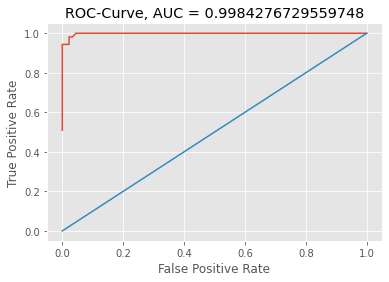

In [379]:
evaluate(rf2_pipe, (X_test2_rf,y_test2_rf))